In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import os
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# data normalization
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y


# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

print("The shape of x_train", x_train.shape)
print("The shape of y_train", y_train.shape)
print("The shape of x_test", x_test.shape)
print("The shape of y_test", y_test.shape)

Using TensorFlow backend.


170500096/170498071 [==============================] - 9s 0us/step
The shape of x_train (50000, 3072)
The shape of y_train (50000, 10)
The shape of x_test (10000, 3072)
The shape of y_test (10000, 10)


In [0]:
# hyperparameters
LEARNING_RATE = 1e-3
EPOCHS = 100
BATCH_SIZE = [128,256,512,1024]
DROPOUT = [0.1,0.3,0.5,0.7,0.9]
MOMENTUM = 0.95

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, MaxPooling2D, MaxPool2D, BatchNormalization,AveragePooling2D, Dropout

# construction a model with dropout layer
def build_mlp(input_shape, output_units=10,DROPOUT=0.5):
    input_layer = keras.layers.Input(input_shape)
    model = Sequential()
    
    # layer 1
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(DROPOUT))
    
    # layer 2
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(DROPOUT))
    
    # layer 3
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(DROPOUT))
    
    # layer 4
    model.add(Dense(10))
    model.add(Activation('softmax'))

    return model

In [6]:
# using SGD as optimizer for training with different batchsize
 
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

results = {} # for plotting later
for bs in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Batch size = %.6f" % (bs))
    model = build_mlp(input_shape=x_train.shape[1:])
    # model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=bs, 
              validation_data=(x_test, y_test), 
              shuffle=True,verbose=2)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-batchsize-%s" % str(bs)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0803 03:46:40.297656 140686504904576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0803 03:46:40.301748 140686504904576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0803 03:46:40.315365 140686504904576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0803 03:46:40.316573 140686504904576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W080

Experiment with Batch size = 128.000000


W0803 03:46:40.890804 140686504904576 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 7s - loss: 2.3271 - acc: 0.2022 - val_loss: 1.8381 - val_acc: 0.3487
Epoch 2/100
 - 4s - loss: 1.9901 - acc: 0.2826 - val_loss: 1.7625 - val_acc: 0.3761
Epoch 3/100
 - 4s - loss: 1.8807 - acc: 0.3143 - val_loss: 1.7213 - val_acc: 0.3865
Epoch 4/100
 - 4s - loss: 1.8266 - acc: 0.3381 - val_loss: 1.6737 - val_acc: 0.4065
Epoch 5/100
 - 4s - loss: 1.7874 - acc: 0.3513 - val_loss: 1.6430 - val_acc: 0.4174
Epoch 6/100
 - 4s - loss: 1.7598 - acc: 0.3597 - val_loss: 1.6187 - val_acc: 0.4259
Epoch 7/100
 - 4s - loss: 1.7340 - acc: 0.3738 - val_loss: 1.5904 - val_acc: 0.4362
Epoch 8/100
 - 4s - loss: 1.7126 - acc: 0.3802 - val_loss: 1.5762 - val_acc: 0.4417
Epoch 9/100
 - 4s - loss: 1.6940 - acc: 0.3884 - val_loss: 1.5760 - val_acc: 0.4441
Epoch 10/100
 - 4s - loss: 1.6796 - acc: 0.3910 - val_loss: 1.5419 - val_acc: 0.4591
Epoch 11/100
 - 4s - loss: 1.6623 - acc: 0.4018 - val_loss: 1.5262 - val_acc: 0.4531
Epoch 12/100
 - 4s - los

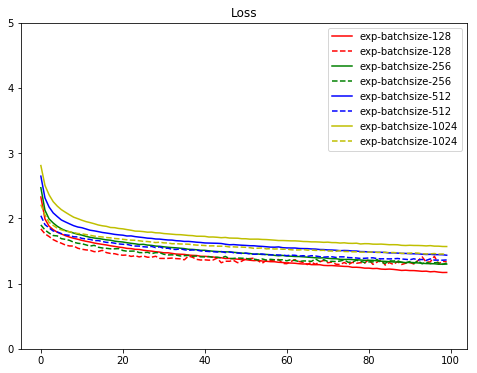

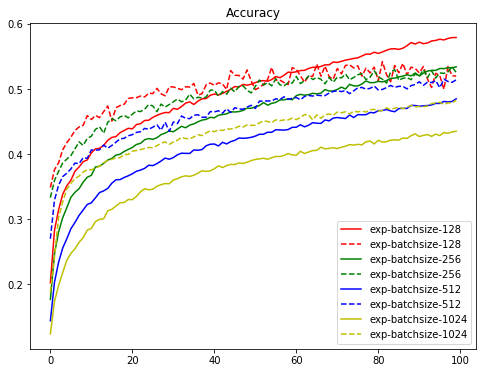

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [8]:
# using SGD as optimizer for training with different dropout ratio
 
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

results = {} # for plotting later
for dpt in DROPOUT:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout = %.6f" % (dpt))
    model = build_mlp(input_shape=x_train.shape[1:],DROPOUT = dpt)
    # model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=128, 
              validation_data=(x_test, y_test), 
              shuffle=True,verbose=2)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-dropout-%s" % str(dpt)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Dropout = 0.100000
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 1.8639 - acc: 0.3455 - val_loss: 1.7097 - val_acc: 0.3913
Epoch 2/100
 - 4s - loss: 1.5965 - acc: 0.4342 - val_loss: 1.5501 - val_acc: 0.4462
Epoch 3/100
 - 4s - loss: 1.4978 - acc: 0.4667 - val_loss: 1.5135 - val_acc: 0.4572
Epoch 4/100
 - 4s - loss: 1.4278 - acc: 0.4907 - val_loss: 1.4901 - val_acc: 0.4602
Epoch 5/100
 - 4s - loss: 1.3733 - acc: 0.5115 - val_loss: 1.4356 - val_acc: 0.4873
Epoch 6/100
 - 4s - loss: 1.3303 - acc: 0.5230 - val_loss: 1.4586 - val_acc: 0.4830
Epoch 7/100
 - 4s - loss: 1.2894 - acc: 0.5400 - val_loss: 1.5026 - val_acc: 0.4705
Epoch 8/100
 - 4s - loss: 1.2554 - acc: 0.5517 - val_loss: 1.4906 - val_acc: 0.4773
Epoch 9/100
 - 4s - loss: 1.2234 - acc: 0.5635 - val_loss: 1.4663 - val_acc: 0.4747
Epoch 10/100
 - 4s - loss: 1.1920 - acc: 0.5758 - val_loss: 1.4755 - val_acc: 0.4756
Epoch 11/100
 - 4s - loss: 1.1620 - acc: 0.5880 - val_loss: 1.4685 - val_a

W0803 04:25:03.188802 140686504904576 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Experiment with Dropout = 0.700000


W0803 04:25:03.295655 140686504904576 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0803 04:25:03.399422 140686504904576 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 2.6488 - acc: 0.1425 - val_loss: 2.0573 - val_acc: 0.2973
Epoch 2/100
 - 4s - loss: 2.1822 - acc: 0.1932 - val_loss: 2.0099 - val_acc: 0.3005
Epoch 3/100
 - 4s - loss: 2.0829 - acc: 0.2205 - val_loss: 1.9494 - val_acc: 0.3169
Epoch 4/100
 - 4s - loss: 2.0292 - acc: 0.2425 - val_loss: 1.9087 - val_acc: 0.3273
Epoch 5/100
 - 4s - loss: 1.9998 - acc: 0.2534 - val_loss: 1.8876 - val_acc: 0.3238
Epoch 6/100
 - 4s - loss: 1.9729 - acc: 0.2642 - val_loss: 1.8513 - val_acc: 0.3322
Epoch 7/100
 - 4s - loss: 1.9569 - acc: 0.2698 - val_loss: 1.8364 - val_acc: 0.3394
Epoch 8/100
 - 4s - loss: 1.9396 - acc: 0.2745 - val_loss: 1.8244 - val_acc: 0.3499
Epoch 9/100
 - 4s - loss: 1.9242 - acc: 0.2837 - val_loss: 1.8062 - val_acc: 0.3534
Epoch 10/100
 - 4s - loss: 1.9104 - acc: 0.2886 - val_loss: 1.7935 - val_acc: 0.3586
Epoch 11/100
 - 4s - loss: 1.9000 - acc: 0.2920 - val_loss: 1.7791 - val_acc: 0.3563
Epoch 12/100
 - 4s - los

W0803 04:31:54.696408 140686504904576 nn_ops.py:4224] Large dropout rate: 0.9 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Experiment with Dropout = 0.900000


W0803 04:31:54.803546 140686504904576 nn_ops.py:4224] Large dropout rate: 0.9 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 3.1128 - acc: 0.1023 - val_loss: 2.2923 - val_acc: 0.1179
Epoch 2/100
 - 4s - loss: 2.3244 - acc: 0.1142 - val_loss: 2.2984 - val_acc: 0.1006
Epoch 3/100
 - 4s - loss: 2.3009 - acc: 0.1197 - val_loss: 2.3007 - val_acc: 0.1001
Epoch 4/100
 - 4s - loss: 2.2922 - acc: 0.1239 - val_loss: 2.3038 - val_acc: 0.1002
Epoch 5/100
 - 4s - loss: 2.2776 - acc: 0.1334 - val_loss: 2.3053 - val_acc: 0.1001
Epoch 6/100
 - 4s - loss: 2.2643 - acc: 0.1376 - val_loss: 2.3106 - val_acc: 0.1001
Epoch 7/100
 - 4s - loss: 2.2451 - acc: 0.1444 - val_loss: 2.3150 - val_acc: 0.1021
Epoch 8/100
 - 4s - loss: 2.2304 - acc: 0.1479 - val_loss: 2.3214 - val_acc: 0.1009
Epoch 9/100
 - 4s - loss: 2.2091 - acc: 0.1551 - val_loss: 2.3231 - val_acc: 0.1019
Epoch 10/100
 - 4s - loss: 2.1961 - acc: 0.1547 - val_loss: 2.3272 - val_acc: 0.1038
Epoch 11/100
 - 4s - loss: 2.1826 - acc: 0.1595 - val_loss: 2.3356 - val_acc: 0.1032
Epoch 12/100
 - 4s - los

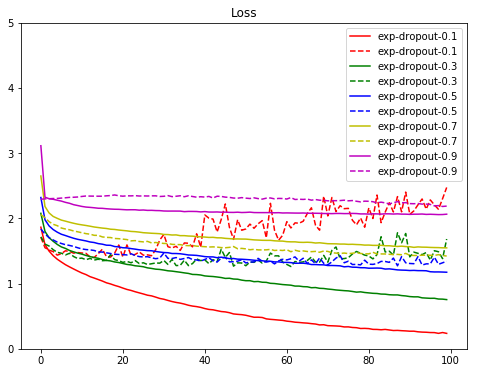

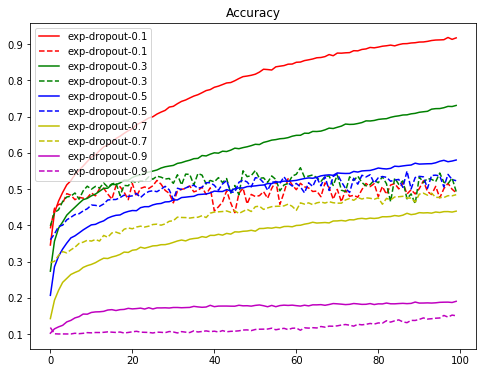

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()